In [3]:
!pip install TA-Lib

     ---------------------------------------- 0.0/357.1 kB ? eta -:--:--
     ------------------------------------- 357.1/357.1 kB 10.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build TA-Lib


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [20 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\talib
  copying talib\abstract.py -> build\lib.win-amd64-cpython-38\talib
  copying talib\deprecated.py -> build\lib.win-amd64-cpython-38\talib
  copying talib\stream.py -> build\lib.win-amd64-cpython-38\talib
  copying talib\__init__.py -> build\lib.win-amd64-cpython-38\talib
  running build_ext
  building 'talib._ta_lib' extension
  creating build\temp.win-amd64-cpython-38
  creating build\temp.win-amd64-cpython-38\Release
  creating build\temp.win-amd64-cpython-38\Release\talib
  "C:\Program Files (x86)\Microsoft Visual Studio\2022\BuildTools\VC\Tools\MSVC\14.37.32822\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -Ic:\ta-lib\c\include -IC:\Users\ashis\AppData\Local\Temp\pip-build-env-dbt8dr_a\normal\Lib\site-packages\numpy\core\inclu

[*********************100%%**********************]  1 of 1 completed


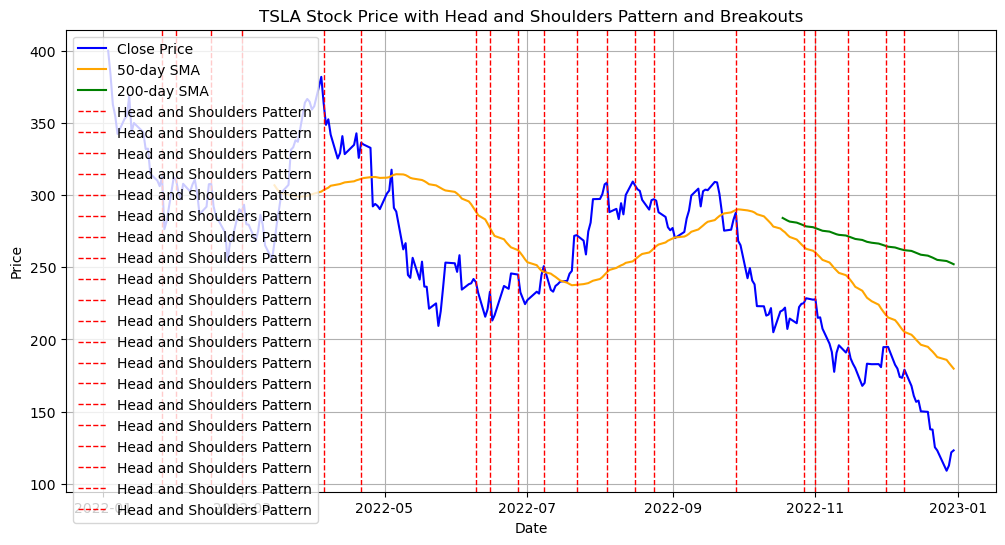

In [5]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Fetch historical data for TSLA from Yahoo Finance
symbol = "TSLA"
start_date = "2022-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calculate Simple Moving Averages (SMA)
data['SMA50'] = ta.sma(data['Close'], length=50)
data['SMA200'] = ta.sma(data['Close'], length=200)

# Detect Head and Shoulders pattern
def detect_head_shoulders(data):
    patterns = []
    for i in range(2, len(data) - 2):
        if (
            data['High'][i] > data['High'][i - 1] and
            data['High'][i] > data['High'][i - 2] and
            data['High'][i] > data['High'][i + 1] and
            data['High'][i] > data['High'][i + 2] and
            data['Low'][i] > data['Low'][i - 1] and
            data['Low'][i] > data['Low'][i - 2] and
            data['Low'][i] > data['Low'][i + 1] and
            data['Low'][i] > data['Low'][i + 2]
        ):
            patterns.append(i)
    return patterns

head_shoulders_patterns = detect_head_shoulders(data)

# Analyze breakouts
breakouts = []
for i in head_shoulders_patterns:
    if data['Close'][i] > data['SMA200'][i]:
        breakouts.append(i)

# Create a chart
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['SMA50'], label='50-day SMA', color='orange')
plt.plot(data.index, data['SMA200'], label='200-day SMA', color='green')

# Highlight Head and Shoulders pattern
for i in head_shoulders_patterns:
    plt.axvline(data.index[i], color='red', linestyle='--', linewidth=1, label='Head and Shoulders Pattern')

# Highlight Breakouts
for i in breakouts:
    plt.scatter(data.index[i], data['Close'][i], color='green', marker='^', s=100, label='Breakout')

plt.title(f'{symbol} Stock Price with Head and Shoulders Pattern and Breakouts')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


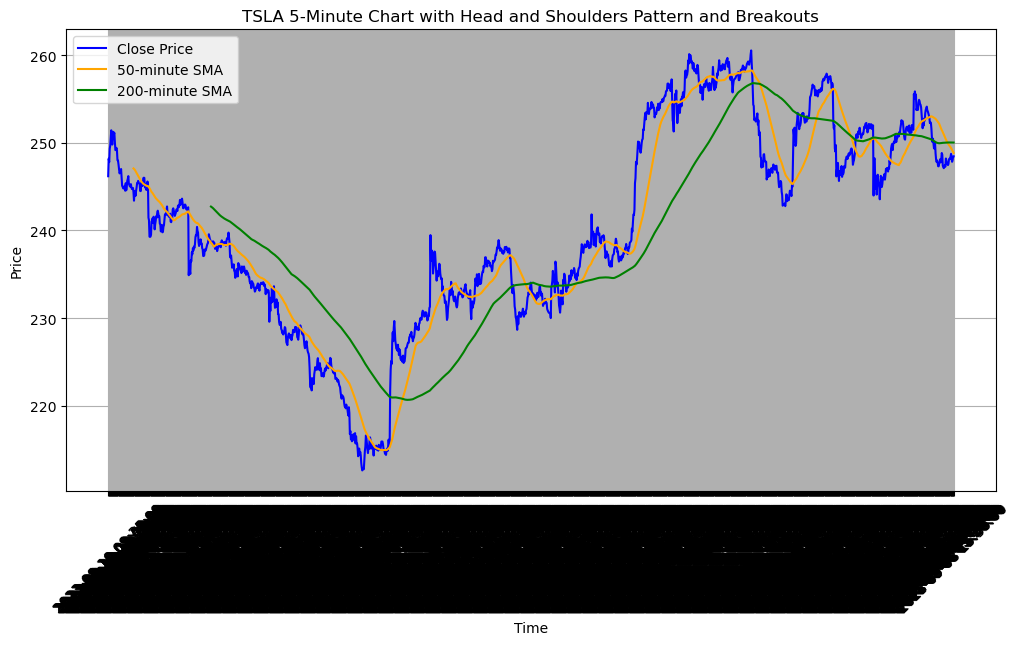

In [20]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

# Define the symbol and date range
symbol = "TSLA"
start_date = "2023-08-10"
end_date = "2023-09-10"

# Fetch intraday data at a 5-minute interval
data = yf.download(symbol, start=start_date, end=end_date, interval="5m")

# Calculate Simple Moving Averages (SMA)
data['SMA50'] = ta.sma(data['Close'], length=50)
data['SMA200'] = ta.sma(data['Close'], length=200)

# Detect Head and Shoulders pattern
def detect_head_shoulders(data):
    patterns = []
    for i in range(2, len(data) - 2):
        if (
            data['High'][i] > data['High'][i - 1] and
            data['High'][i] > data['High'][i - 2] and
            data['High'][i] > data['High'][i + 1] and
            data['High'][i] > data['High'][i + 2] and
            data['Low'][i] > data['Low'][i - 1] and
            data['Low'][i] > data['Low'][i - 2] and
            data['Low'][i] > data['Low'][i + 1] and
            data['Low'][i] > data['Low'][i + 2]
        ):
            patterns.append(i)
    return patterns

head_shoulders_patterns = detect_head_shoulders(data)

# Analyze breakouts
breakouts = []
for i in head_shoulders_patterns:
    if data['Close'][i] > data['SMA200'][i]:
        breakouts.append(i)

# Convert the datetime index to strings
data['DateStr'] = data.index.strftime('%Y-%m-%d %H:%M:%S')

# Create a chart
plt.figure(figsize=(12, 6))
plt.plot(data['DateStr'], data['Close'], label='Close Price', color='blue')
plt.plot(data['DateStr'], data['SMA50'], label='50-minute SMA', color='orange')
plt.plot(data['DateStr'], data['SMA200'], label='200-minute SMA', color='green')

# Highlight Head and Shoulders pattern
for i in head_shoulders_patterns:
    plt.axvline(data['DateStr'][i], color='red', linestyle='--', linewidth=1, label='Head and Shoulders Pattern')
    

# Highlight Breakouts
for i in breakouts:
    plt.scatter(data['DateStr'][i], data['Close'][i], color='green', marker='^', s=100, label='Breakout')
    
plt.title(f'{symbol} 5-Minute Chart with Head and Shoulders Pattern and Breakouts')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()
